In [2]:
#Importing all the libraries


import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Reading csv file

airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Data Cleaning 
# Checking null values in the data


airbnb_data.isnull().sum().sort_values(ascending=False)



reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [5]:
# Replacing NAN values
from statistics import mean

replace_name_value = "@----@"
replace_host_name_value = "%----%"

airbnb_data['name'].fillna(replace_name_value, inplace=True)           
airbnb_data['host_name'].fillna(replace_host_name_value, inplace=True)

airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)
airbnb_data['last_review'] = airbnb_data['last_review'].fillna(0)



In [6]:
# Checking null values
airbnb_data.isnull().sum().sort_values(ascending=False)



availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

In [9]:

airbnb_data.shape

(48895, 16)

In [7]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [21]:
airbnb_data.to_csv(r'C:\Users\12064\OneDrive\airbnb_final_data.csv')

In [11]:
# Descriptive Analysis

airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


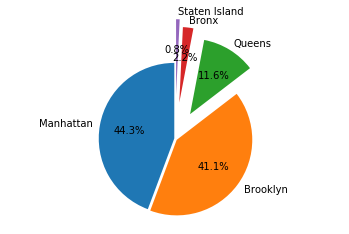

In [17]:
# Digging deep into the data
# checking out how neighbourhood is distributed

neighbour_count = airbnb_data.neighbourhood_group.value_counts()
labels = airbnb_data.neighbourhood_group.value_counts().index

pie_plot = plt.pie(neighbour_count,  shadow=False, labels= labels,
        explode=(0.01, .028, .38, .48, .58), startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()





[Text(0.5, 1.0, ' Room Type')]

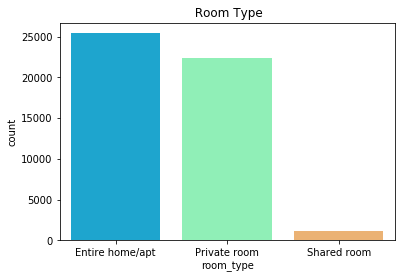

In [20]:
# Number of room types

room_type = airbnb_data.room_type.value_counts()
room_type_chart = sns.countplot(x="room_type", order = airbnb_data.room_type.value_counts().index, data=airbnb_data, palette = 'rainbow')
room_type_chart.set(title= ' Room Type')

#  All the people who rent an Airbnb prefer an entire home

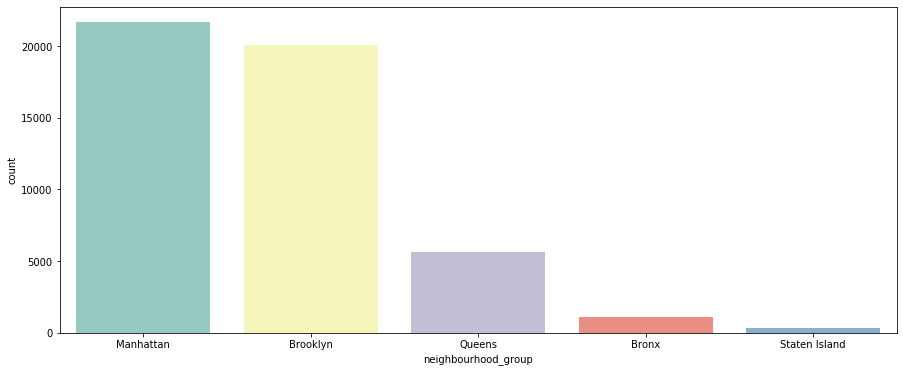

In [13]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(airbnb_data.neighbourhood_group,palette="Set3",order = airbnb_data['neighbourhood_group'].value_counts().index)
plt.show()

# Graph clearly shows the highest and lowest count neighbourhood_group

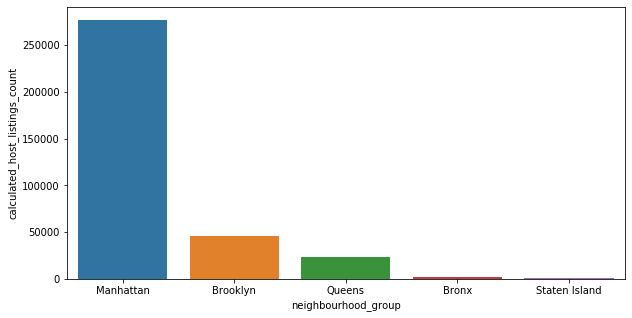

In [24]:
#Neighbourhood distribution according to listing count

count = airbnb_data.groupby('neighbourhood_group')['calculated_host_listings_count'].sum()
C= pd.DataFrame(count).sort_values('calculated_host_listings_count', ascending= False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x= C.index , y='calculated_host_listings_count', data= C)



In [53]:
# Room type wise listings count



D = airbnb_data.groupby(['room_type'])['calculated_host_listings_count'].sum()
data_listings_room = pd.DataFrame(D)
data_listings_room.sort_values(by='calculated_host_listings_count', ascending= False)

,calculated_host_listings_count
room_type,
Entire home/apt,271834
Private room,72062
Shared room,5409


In [51]:
#Neighbourhood_group wise listing count


d= airbnb_data.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum()
data_listings = pd.DataFrame(d)
data_listings.sort_values(by='calculated_host_listings_count', ascending= False)


,calculated_host_listings_count
neighbourhood_group,
Manhattan,277073
Brooklyn,45925
Queens,23005
Bronx,2437
Staten Island,865


In [57]:
#Top 10 hosts according to listing count

H = airbnb_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum()
data_listings_host = pd.DataFrame(H)
data_listings_host.sort_values(by='calculated_host_listings_count', ascending= False).head(10)



,,calculated_host_listings_count
host_name,neighbourhood_group,
Sonder (NYC),Manhattan,106929
Blueground,Manhattan,53360
Kara,Manhattan,14669
Sonder,Manhattan,9216
Jeremy & Laura,Manhattan,9216
Corporate Housing,Manhattan,8281
Kazuya,Queens,8137
Ken,Manhattan,7500
Pranjal,Manhattan,4225


In [131]:

#Top 10 host by reviews

top_host_by_reviews = airbnb_data.groupby(['host_id','host_name'])[['price','number_of_reviews']].sum().sort_values(by='number_of_reviews', ascending= False).head(10)

top_host_by_reviews


,,price,number_of_reviews
host_id,host_name,,
37312959,Maya,213,2273
344035,Brooklyn& Breakfast -Len-,970,2205
26432133,Danielle,236,2017
35524316,Yasu & Akiko,2055,1971
40176101,Brady,523,1818
4734398,Jj,147,1798
16677326,Alex And Zeena,1020,1355
6885157,Randy,851,1346
219517861,Sonder (NYC),82795,1281


In [32]:
#Top 10 host in different neighbourhood groups with reviews and room_type they are offering


top_host_by_reviews_room_type = airbnb_data.groupby(['host_id','host_name','neighbourhood_group','room_type'])[['number_of_reviews']].sum().sort_values(by='number_of_reviews', ascending= False).head(10)

top_host_by_reviews_room_type

# Reviews are not being affected by the listing count

,,,,number_of_reviews
host_id,host_name,neighbourhood_group,room_type,
37312959,Maya,Queens,Private room,2273
344035,Brooklyn& Breakfast -Len-,Brooklyn,Private room,2205
35524316,Yasu & Akiko,Manhattan,Private room,1837
40176101,Brady,Brooklyn,Private room,1818
4734398,Jj,Manhattan,Private room,1798
26432133,Danielle,Queens,Private room,1793
16677326,Alex And Zeena,Manhattan,Private room,1355
6885157,Randy,Brooklyn,Private room,1323
23591164,Angela,Queens,Private room,1269


In [132]:

#Top data of reviews by Room_type 


top_host_by_room_type = airbnb_data.groupby('room_type')[['price','number_of_reviews']].sum().sort_values(by='number_of_reviews', ascending= False)

top_host_by_room_type

,price,number_of_reviews
room_type,,
Entire home/apt,5381480,580403
Private room,2004450,538346
Shared room,81348,19256


In [85]:
# Top 10 max price wise neighbouhood/ groups


max_price_neighbourhood_group = airbnb_data.groupby(['room_type','neighbourhood_group','minimum_nights'])['price'].max()

data_max_price = pd.DataFrame(max_price_neighbourhood_group)
data_max_price.sort_values('price', ascending = False).head(10)

price
room_type       neighbourhood_group minimum_nights       
Entire home/apt Brooklyn            5               10000
Private room    Queens              100             10000
Entire home/apt Manhattan           30              10000
                                    5                9999
Private room    Manhattan           99               9999
Entire home/apt Brooklyn            1                8000
                Manhattan           1                7703
Private room    Brooklyn            1                7500
Entire home/apt Manhattan           180              6500
Private room    Manhattan           30               6500

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


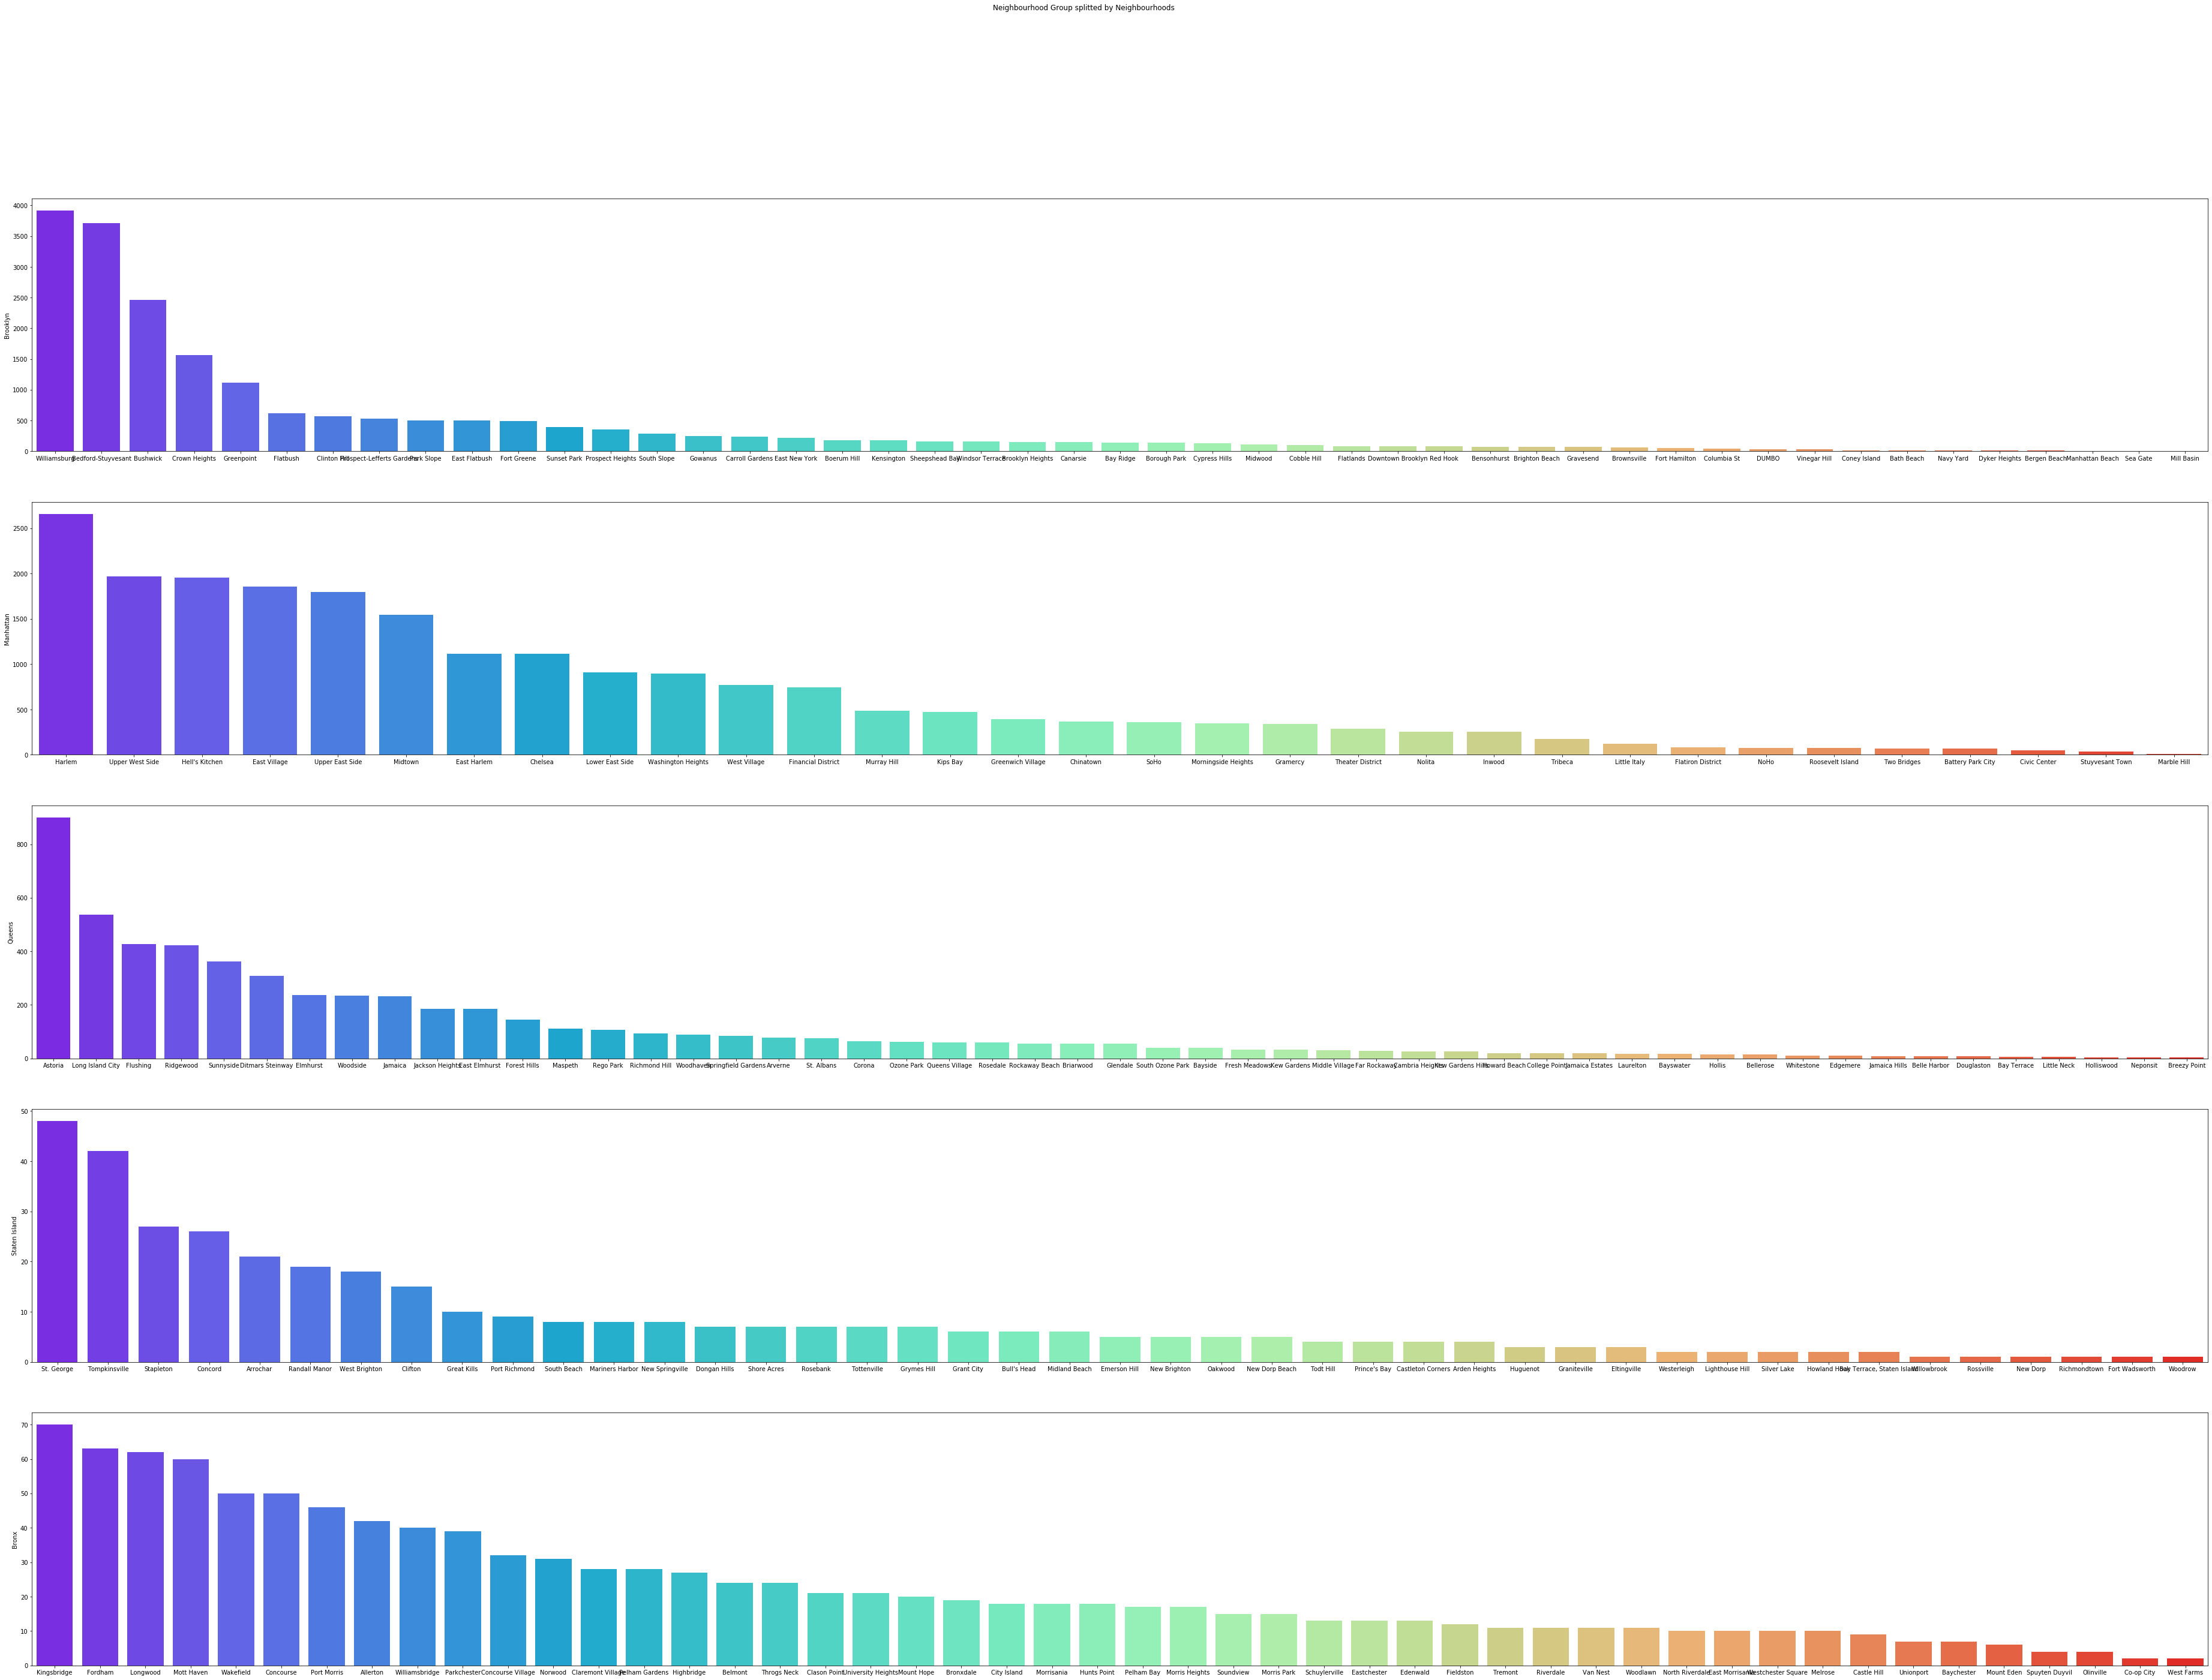

In [93]:
# Neighbour in each neighbourhood group

unique = airbnb_data.neighbourhood_group.unique()
print(unique)
f, subplots = plt.subplots(len(airbnb_data.neighbourhood_group.unique()), 1, figsize=(65, 45))
for i, neighbourhood_group in enumerate(airbnb_data.neighbourhood_group.unique()):
    neighbourhoods = airbnb_data.neighbourhood[airbnb_data.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rainbow", ax=ax)
    ax.set_ylabel(neighbourhood_group)

f.suptitle('Neighbourhood Group splitted by Neighbourhoods ')
plt.show()


# Graph shows which neighbour is highest and lowest in various neighbourhood_group
# we finally came up that the most rented neighbourhoods are:

#Williamsburg (Brooklyn).
#Harlem (Manhattan).
#Astoria (Queens).
#St.George (Staten Island)
#Kinsbridge (Bronx)

[Text(0, 0.5, 'Price($)')]

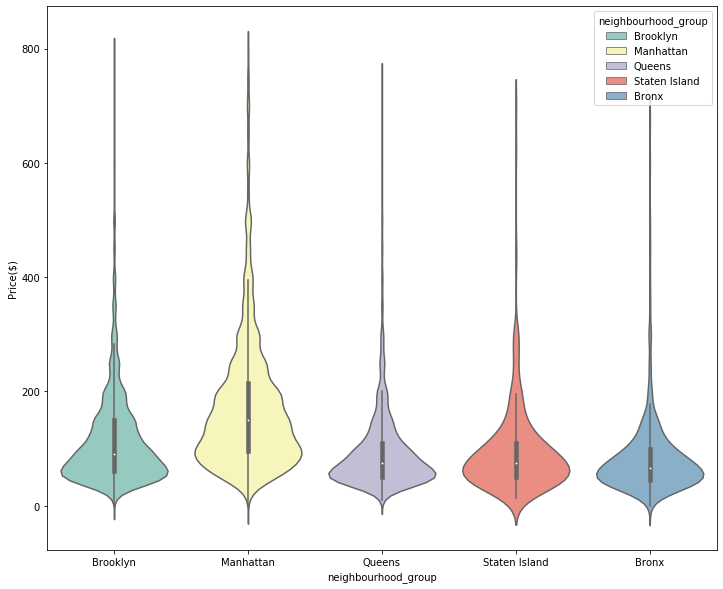

In [96]:
#violin plot for price for each neighbourhood group


price_value = 800
filter_by_price = airbnb_data[airbnb_data.price < price_value]

fig, ax = plt.subplots(figsize=(12, 10))

price_plot = sns.violinplot( ax=ax,x="neighbourhood_group", y="price", hue="neighbourhood_group"
               , data= filter_by_price,dodge=False, palette= 'Set3')
price_plot.set(ylabel = 'Price($)')


# A slightly overpriced in Manhattan and Brooklyn neighborhood group, with the majority of density in prices between $200 - $400
# Manhattan neighbourhood group between $100 - $600.


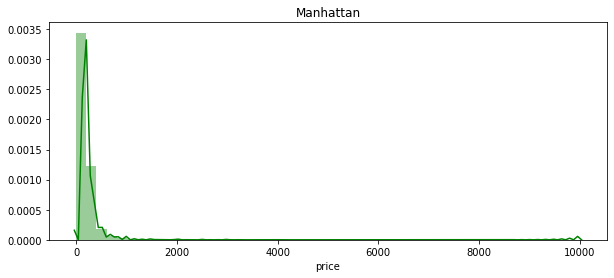

In [97]:


f,ax = plt.subplots(figsize=(10,4))
df = airbnb_data[airbnb_data.neighbourhood_group=="Manhattan"]['price']
dist_plot= sns.distplot(df, color='g')
dist_plot.set_title('Manhattan')
                 

plt.show()

# Manhattan, brooklyn and Queens seems to be most expensive neighbourhood with max range going to $10000
#Brooklyn averages around $70-500 per night depending upon the neighbourhood.
#Manhattan averages around $80-490 
#Queens averages around $60-280
#Staten Island averages around $50-800
#Bronx averages around $50-450 

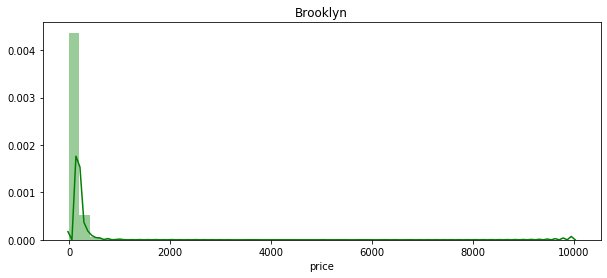

In [132]:
f,ax = plt.subplots(figsize=(10,4))
df = airbnb_data[airbnb_data.neighbourhood_group=="Brooklyn"]['price']
dist_plot= sns.distplot(df, color='g')
dist_plot.set_title('Brooklyn')
                 

plt.show()

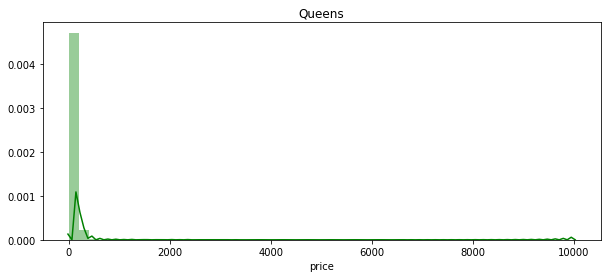

In [98]:
f,ax = plt.subplots(figsize=(10,4))
df = airbnb_data[airbnb_data.neighbourhood_group=="Queens"]['price']
dist_plot= sns.distplot(df, color='g')
dist_plot.set_title('Queens')
                 

plt.show()

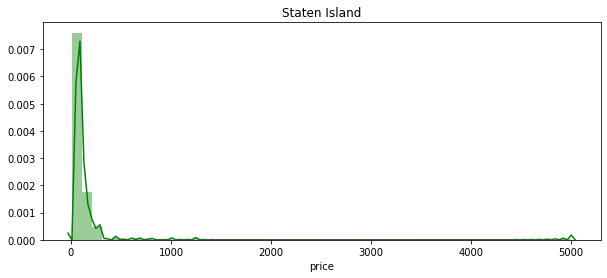

In [99]:
f,ax = plt.subplots(figsize=(10,4))
df = airbnb_data[airbnb_data.neighbourhood_group=="Staten Island"]['price']
dist_plot= sns.distplot(df, color='g')
dist_plot.set_title('Staten Island')
                 

plt.show()

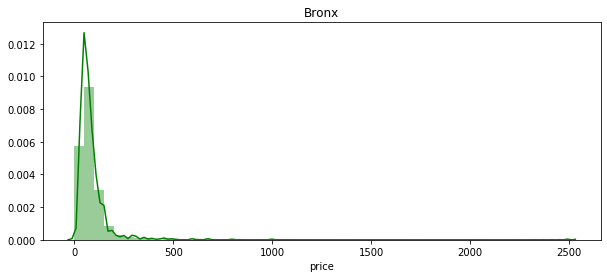

In [100]:
f,ax = plt.subplots(figsize=(10,4))
df = airbnb_data[airbnb_data.neighbourhood_group=="Bronx"]['price']
dist_plot= sns.distplot(df, color='g')
dist_plot.set_title('Bronx')
                 

plt.show()

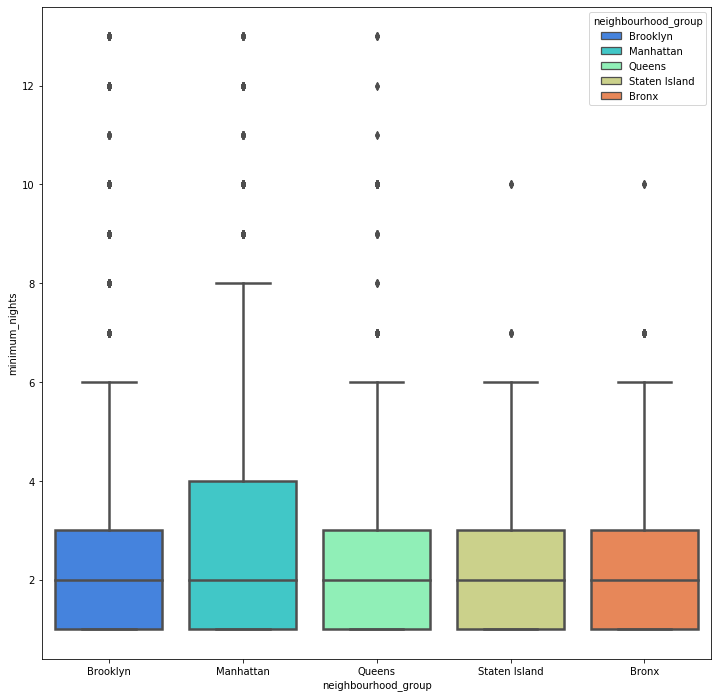

In [101]:
# filtering 
#This Bloxplot has been filtered, in order to avoid an extreme and fake values from dataset like 2000 minimum nights and so on..

min_nights_filter = 14
airbnb_filter_night = airbnb_data[airbnb_data.minimum_nights < min_nights_filter]
fig, ax = plt.subplots(figsize=(12, 12))
nights_per_neighbourhood= sns.boxplot(x="neighbourhood_group", y="minimum_nights", ax=ax,
                              hue="neighbourhood_group", dodge=False, linewidth=2.5,
                              data= airbnb_filter_night, palette= 'rainbow')
plt.show()



# max nights are spent in Manhattan

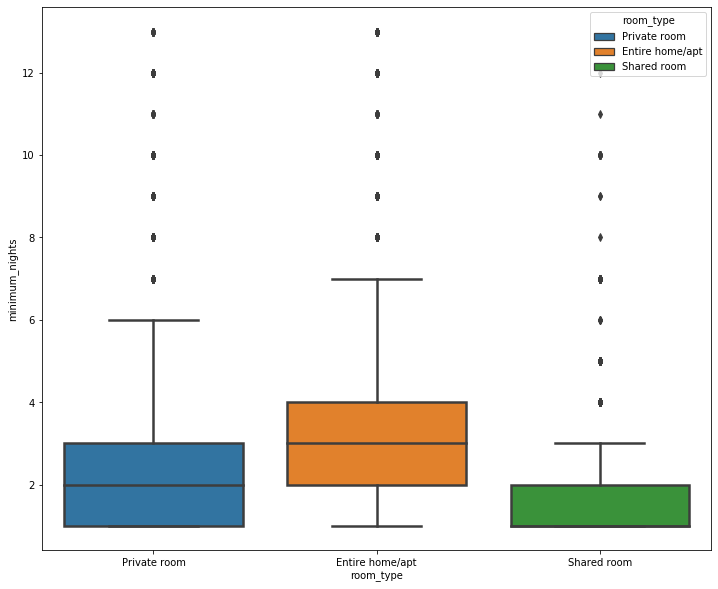

In [102]:
#filtering to get rid of the outliers

min_nights_filter = 14
airbnb_filter_night = airbnb_data[airbnb_data.minimum_nights < min_nights_filter]
fig, ax = plt.subplots(figsize=(12, 10))
nights_per_neighbourhood= sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data= airbnb_filter_night)
plt.show()

#Entire property is preffered by customers statying for more number of nights

(10.0, 0.0)

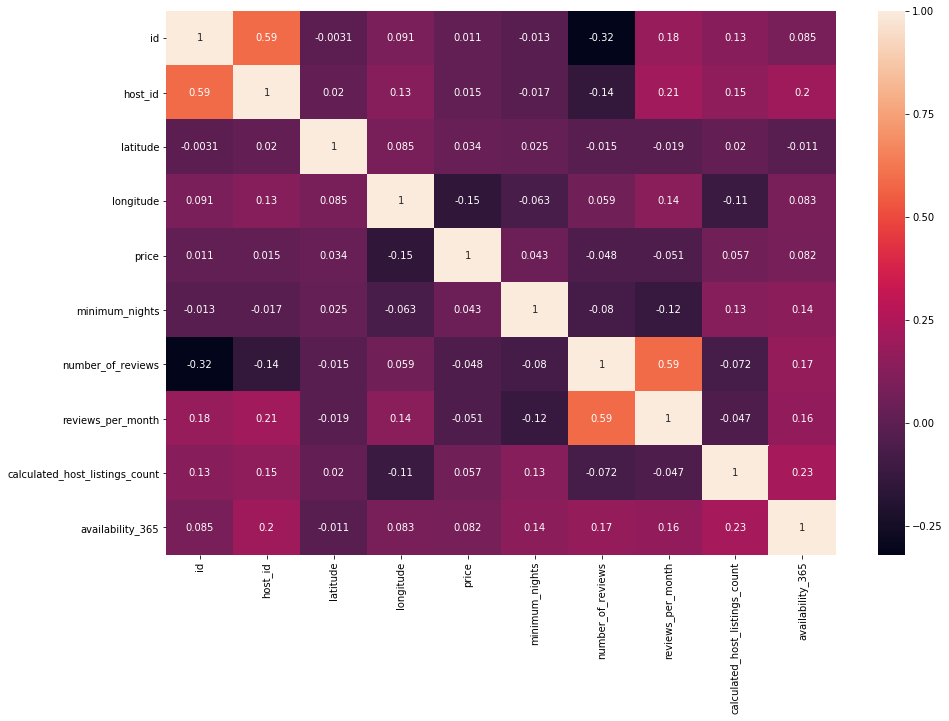

In [112]:
# Inferential statistics
# Getting correlation idea by heatmap

airbnb_correlation = airbnb_data.corr()
plt.figure(figsize=(15, 10))
heat_map= sns.heatmap(airbnb_correlation, annot=True)
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)

# No strong correlation


<Figure size 1080x720 with 0 Axes>

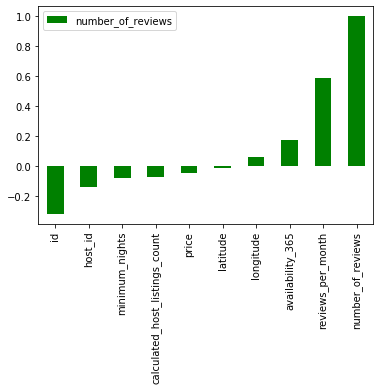

<Figure size 1080x720 with 0 Axes>

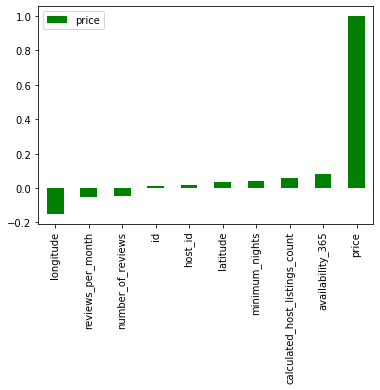

<Figure size 1080x720 with 0 Axes>

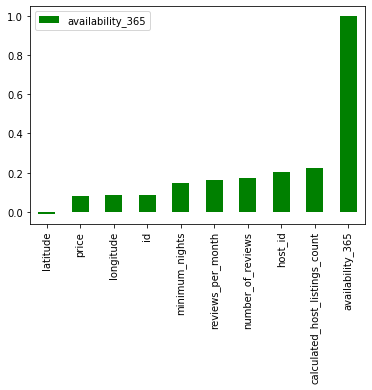

<Figure size 1080x720 with 0 Axes>

In [116]:
#plotting correlation w.r.t number of reviews, availabilty, and price

correlation_sorted = airbnb_correlation.sort_values('number_of_reviews')
Correlation_barplot = correlation_sorted.plot(y= 'number_of_reviews', kind="bar", color='g')
plt.figure(figsize=(15, 10))

correlation_sorted = airbnb_correlation.sort_values('price')
Correlation_barplot = correlation_sorted.plot(y= 'price', kind="bar", color='g')
plt.figure(figsize=(15, 10))


correlation_sorted = airbnb_correlation.sort_values('availability_365')
Correlation_barplot = correlation_sorted.plot(y= 'availability_365', kind="bar", color='g')
plt.figure(figsize=(15, 10))

# no strong correlation of existing features with the price
#New features are required

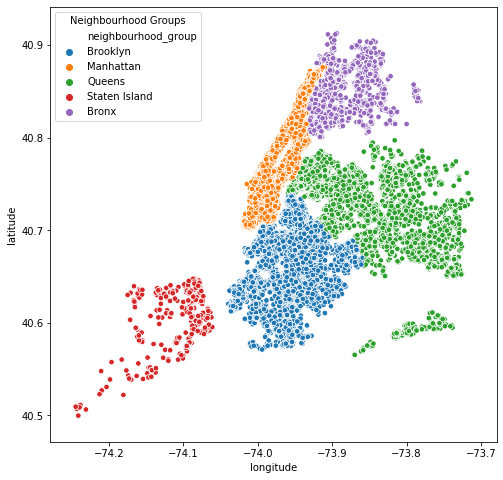

In [21]:
# Map view of the neighbourhood groups

fig, ax = plt.subplots(figsize=(8,8))

scatter_map = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=30, ax=ax, data=airbnb_data)
ax.grid(False)
plt.legend(title='Neighbourhood Groups')
plt.show()

# Inspite of having smaller area Manhattan shows max property count

In [22]:
# Adding Dummies taking into account all  the categorical features

dummy_room = pd.get_dummies(airbnb_data.room_type)

X= pd.concat([airbnb_data, dummy_room], axis=1)

dummy_neighbourhood_group = pd.get_dummies(airbnb_data.neighbourhood_group)
X = pd.concat([airbnb_data, dummy_neighbourhood_group], axis=1)

#dropping columns after adding dummies
X= X.drop(columns = 'neighbourhood_group')
X= X.drop(columns = 'room_type')

X['last_review'] = pd.to_datetime(X['last_review'], format="%Y-%m-%d").dt.strftime("%Y%m%d").astype(int)
X

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,20181019,0.21,6,365,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,20190521,0.38,2,355,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,19700101,0.00,1,365,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,20190705,4.64,1,194,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,20181119,0.10,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,19700101,0.00,2,9,0,1,0,0,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,19700101,0.00,2,36,0,1,0,0,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,19700101,0.00,1,27,0,0,1,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,19700101,0.00,6,2,0,0,1,0,0


In [23]:
# Train test split
# Splitting the data into 80% train data and 20% test data


#X = airbnb_data[['host_id','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
from sklearn.model_selection import train_test_split

y= X['price']
X.drop('price', inplace= True, axis=1)
X.drop('name', inplace= True, axis= 1)
X.drop('neighbourhood', inplace= True, axis= 1)
X.drop('host_name', inplace= True, axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




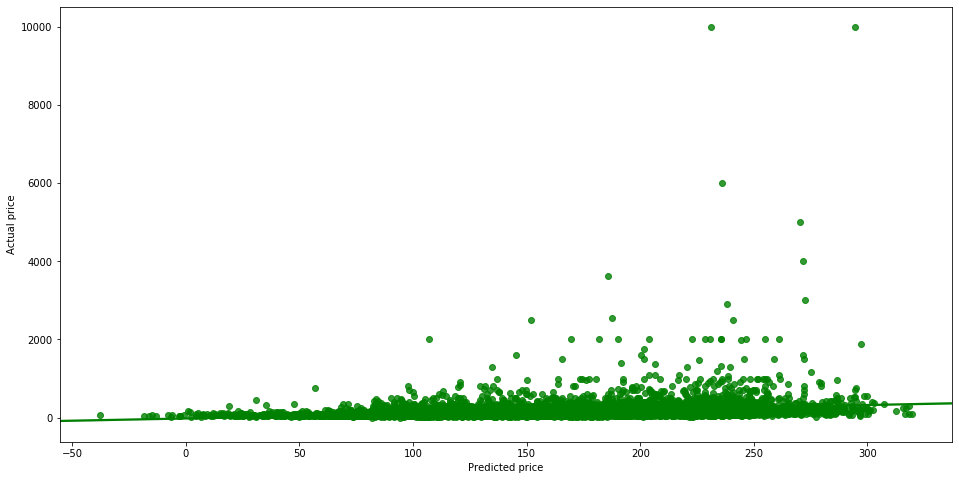

0.06841834702964478


In [24]:
# Machine learning model 
#Model 1 ----- Linear Regression 

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test, color='g')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

plt.show()



score_1 = model_1.score(X_test,y_test)
print(score_1)

# Very low R2 score which might be because of the wek correlated features with the price
# and less available features in the existing data


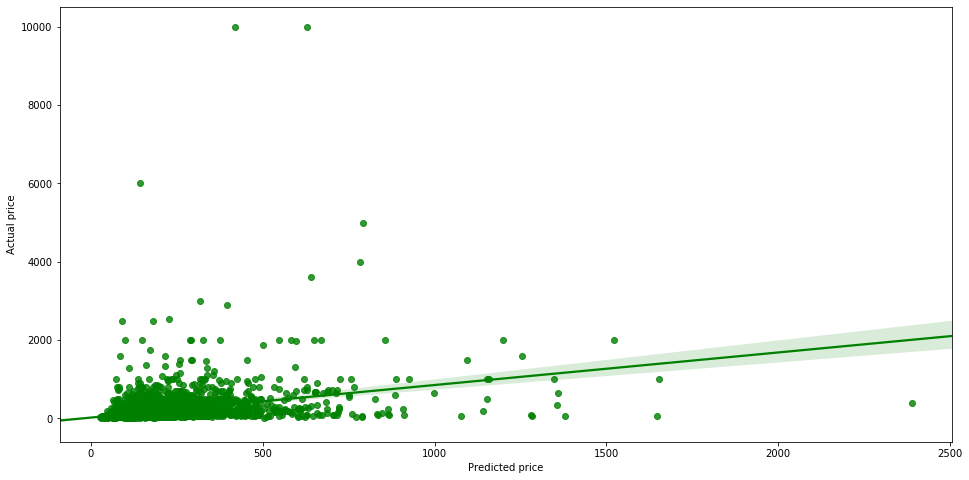

0.1353174741747094


In [25]:
# Model 2------ Random Forest Regressor


from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_estimators=100, n_jobs=1)
model_2.fit(X_train,y_train)


y_pred = model_2.predict(X_test)

plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test, color='g')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

plt.show()


score_2 = model_2.score(X_test,y_test)
print(score_2)

# Better R2 score than linear regression but still low because of the same reason 

In [26]:
#Prediction of price by using model 2 and error check

y_prediction_model2 = model_2.predict(X_test)
print(y_prediction_model2)
y_prediction_model2 = pd.DataFrame(data=y_prediction_model2,index=X_test.index)
((y_prediction_model2[0]-y_test)**2).sum()/len(y_test)

[449.57 222.89 156.1  ... 147.04 141.8   92.71]


47590.59882384702

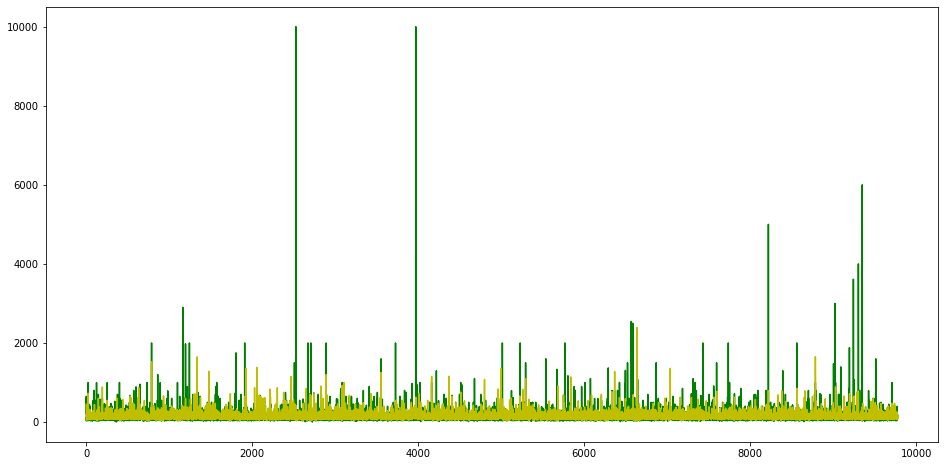

In [27]:
# Model 2 fitting with the actual price values
plt.figure(figsize=(16,8))
plt.plot(range(len(y_prediction_model2)),y_test, color='g')
plt.plot(range(len(y_prediction_model2)),y_prediction_model2[0], color='y')


In [29]:
# Prediction of price by using model 1 and error check

y_prediction_model1 = model_1.predict(X_test)
print(y_prediction_model1)
y_prediction_model1 = pd.DataFrame(data=y_prediction_model1,index=X_test.index)
((y_prediction_model1[0]-y_test)**2).sum()/len(y_test)

[250.38586947 204.21774709  95.98273337 ... 134.2642587   93.86684342
 101.19110133]


51272.608609562965

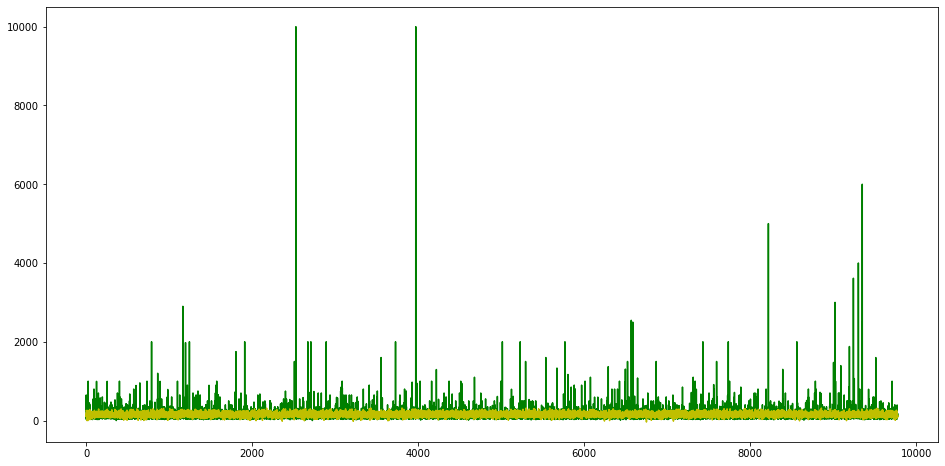

In [30]:
# Model 1 fittng with the actual price values

plt.figure(figsize=(16,8))
plt.plot(range(len(y_prediction_model1)),y_test, color='g')
plt.plot(range(len(y_prediction_model1)),y_prediction_model1[0], color='y')


In [31]:
# Exporting prediction files

y_prediction_model2 = pd.DataFrame( data=y_prediction_model2,index=X_test.index)
y_prediction_model2
y_prediction_model2.to_csv('Prediction airbnb Export.csv')